## **Цель задания**: 
Используя линейную регрессию, постройте модель, предсказывающую медианную стоимость домов (целевая переменная `MEDV`) на основе выбранных признаков.

## **Шаги выполнения**:
   - Загрузите датасет о жилищных ценах в Бостоне. Описание датасета и сам датасет можно найти в репозиториях с открытыми данными или встроить его непосредственно из библиотеки `scikit-learn`.
   - Проведите первичный анализ данных: изучите распределение целевой переменной, проверьте наличие пропущенных значений, оцените корреляцию между признаками.
   - Выберите один или несколько признаков для построения модели линейной регрессии. Обоснуйте свой выбор.
   - Разделите датасет на обучающую и тестовую выборки.
   - Обучите модель линейной регрессии на обучающей выборке.
   - Оцените качество модели на тестовой выборке, используя метрики MAE (средняя абсолютная ошибка) и MSE (среднеквадратичная ошибка).
   - Проанализируйте полученные результаты: какие признаки наиболее важны для модели, удовлетворительно ли качество предсказания?

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('datasets/housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [80]:
print(np.shape(data))
print(data.describe(include="all"))
print()
print(data.isnull().sum())

(506, 14)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861

In [81]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


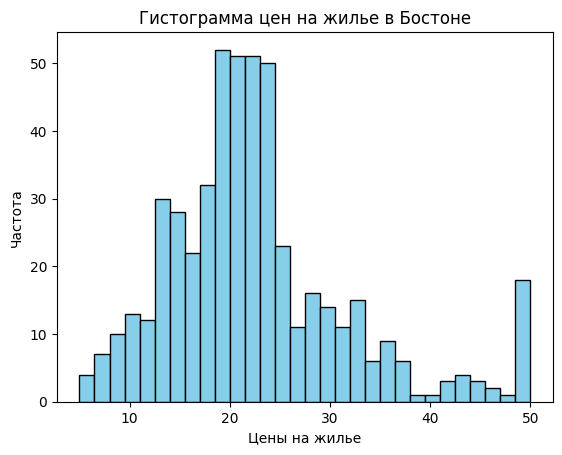

In [82]:
plt.hist(data['MEDV'], bins=30, color='skyblue', edgecolor='black')  # Пример: использование 30 интервалов
plt.xlabel('Цены на жилье')  # Название оси x
plt.ylabel('Частота')   # Название оси y
plt.title('Гистограмма цен на жилье в Бостоне')  # Заголовок гистограммы
plt.show()

Text(0, 0.5, 'LSTAT')

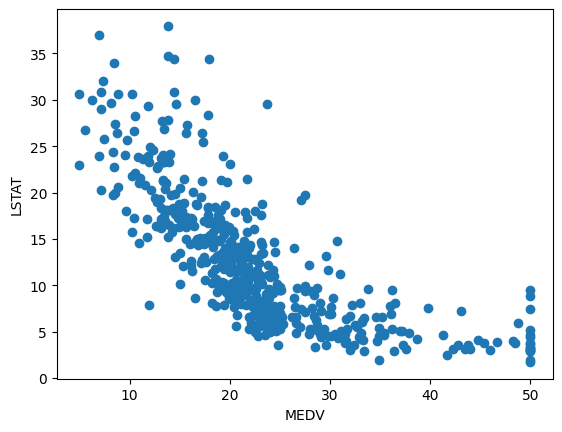

In [83]:
medv = data["MEDV"]
lstat = data["LSTAT"]
plt.scatter(medv, lstat)
plt.xlabel("MEDV")
plt.ylabel("LSTAT")

In [84]:
data = data[data["MEDV"] <= 45]

Text(0, 0.5, 'LSTAT')

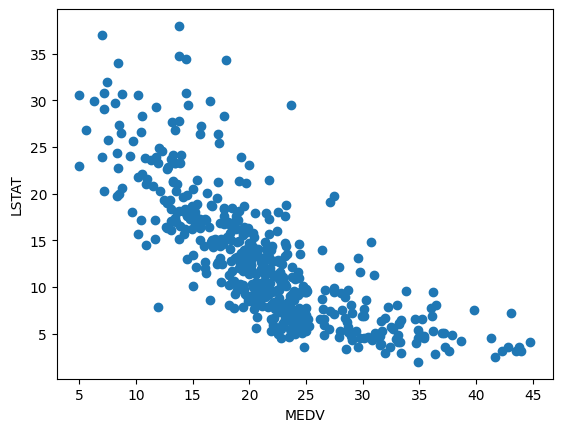

In [85]:
medv = data["MEDV"]
lstat = data["LSTAT"]
plt.scatter(medv, lstat)
plt.xlabel("MEDV")
plt.ylabel("LSTAT")

Text(0, 0.5, 'RM')

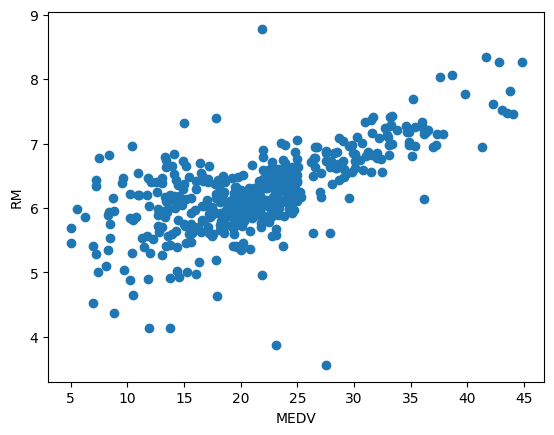

In [86]:
rm = data["RM"]

plt.scatter(medv, rm)
plt.xlabel("MEDV")
plt.ylabel("RM")

In [87]:
data = data[data["RM"] > 4]
data = data.drop(364)


Text(0, 0.5, 'RM')

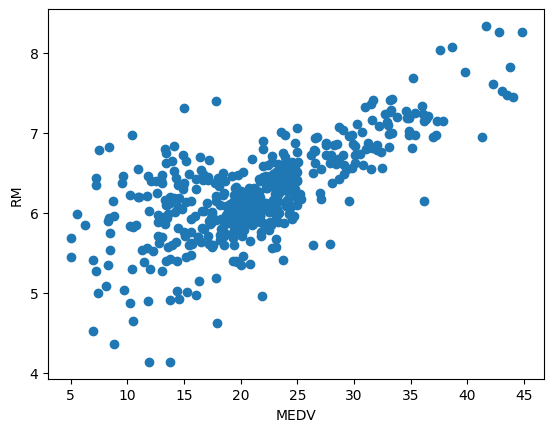

In [88]:
rm = data["RM"]

plt.scatter(data["MEDV"], data["RM"])
plt.xlabel("MEDV")
plt.ylabel("RM")

In [106]:
X = data[["RM", "LSTAT"]].values
Y = np.array(data["MEDV"])

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.02, random_state=15)

In [126]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [127]:
Y_pred = model.predict(X_test)
Y_pred

array([13.13011434, 29.08277571, 16.02763321, 19.72972484, 16.29877188,
       24.87348688, 30.3465401 , 24.93097512, 29.83083387, 20.80759161])

In [128]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
mae, mse

(2.7022682488338807, 13.155917461355582)

In [129]:
result = pd.DataFrame({'test': Y_test, 'pred': Y_pred})
result

,test,pred
0,12.8,13.130114
1,36.1,29.082776
2,13.1,16.027633
3,19.6,19.729725
4,10.2,16.298772
5,22.1,24.873487
6,35.4,30.346540
7,26.4,24.930975
8,29.6,29.830834
9,21.8,20.807592


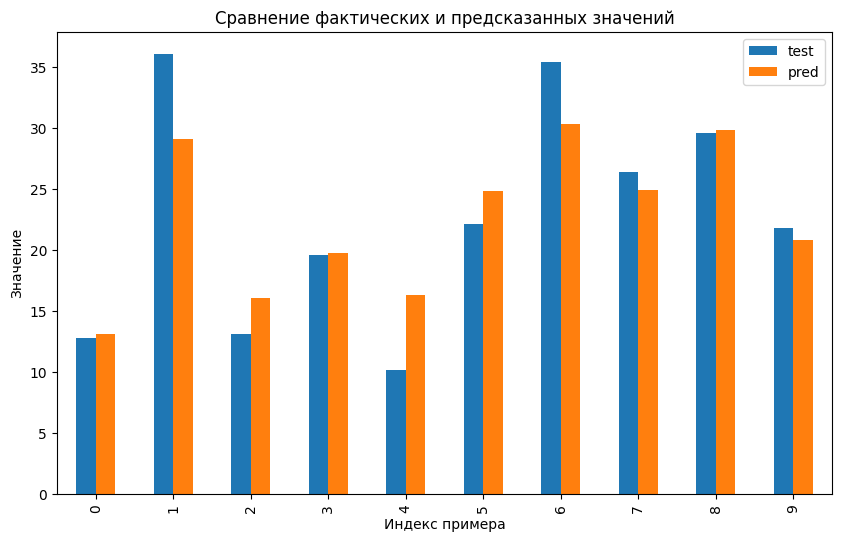

In [130]:
result.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Индекс примера')
plt.ylabel('Значение')
plt.title('Сравнение фактических и предсказанных значений')
plt.show()